In [159]:
import sympy as s
s.init_printing(fontsize=1000)

In [160]:
Swx, Swy, Swz, Svx, Svy, Svz = s.symbols("S_{wx} S_{wy} S_{wz} S_{vx} S_{vy} S_{vz}")

In [161]:
def sqr_bracket(a,b,c):
    return s.Matrix([
        [0,-c,b],
        [c,0,-a],
        [-b,a,0]
    ])

def exp(a,b,c, theta):
    sqr = sqr_bracket(a,b,c)
    return s.eye(3) + s.sin(theta)*sqr + (1-s.cos(theta))*(sqr@sqr)

def exp_twist(Swx, Swy, Swz, Svx, Svy, Svz):
    theta = s.sqrt(Swx**2+Swy**2+Swz**2)
    sqr = sqr_bracket(Swx, Swy, Swz)
    rot = s.eye(3) + s.sin(theta)*sqr/theta + ((1-s.cos(theta))/(theta**2))*(sqr@sqr)

    Sv = s.Matrix([[Svx], [Svy], [Svz]])

    trans = (s.eye(3) + ((1-s.cos(theta))/(theta**2))*sqr + ((theta-s.sin(theta))/(theta**3))*(sqr@sqr))@Sv

    mat = s.eye(4)

    mat[:3, :3] = rot
    mat[:3, 3] = trans

    return mat
def rotation(Swx, Swy, Swz, Svx, Svy, Svz):
    theta = s.sqrt(Swx**2+Swy**2+Swz**2)
    sqr = sqr_bracket(Swx, Swy, Swz)
    rot = s.eye(3) + s.sin(theta)*sqr/theta + ((1-s.cos(theta))/(theta**2))*(sqr@sqr)

    return rot

def translation(Swx, Swy, Swz, Svx, Svy, Svz):
    theta = s.sqrt(Swx**2+Swy**2+Swz**2)
    sqr = sqr_bracket(Swx, Swy, Swz)

    Sv = s.Matrix([[Svx], [Svy], [Svz]])

    return (s.eye(3) + ((1-s.cos(theta))/(theta**2))*sqr + ((theta-s.sin(theta))/(theta**3))*(sqr@sqr))@Sv

exp_twist(Swx, Swy, Swz, Svx, Svy, Svz)


⎡                 ⎛       ⎛   _____________________________⎞⎞                 
⎢                 ⎜       ⎜  ╱       2         2         2 ⎟⎟ ⎛        2      
⎢                 ⎝1 - cos⎝╲╱  S_{wx}  + S_{wy}  + S_{wz}  ⎠⎠⋅⎝- S_{wy}  - S_{
⎢                 ────────────────────────────────────────────────────────────
⎢                                          2         2         2              
⎢                                    S_{wx}  + S_{wy}  + S_{wz}               
⎢                                                                             
⎢                                                                             
⎢              ⎛       ⎛   _____________________________⎞⎞             ⎛   ___
⎢              ⎜       ⎜  ╱       2         2         2 ⎟⎟             ⎜  ╱   
⎢S_{wx}⋅S_{wy}⋅⎝1 - cos⎝╲╱  S_{wx}  + S_{wy}  + S_{wz}  ⎠⎠   S_{wz}⋅sin⎝╲╱  S_
⎢───────────────────────────────────────────────────────── + ─────────────────
⎢                     2         2         2         

In [162]:
qx, qy, qz, px, py, pz, nx,ny,nz = s.symbols("q_x q_y q_z p_x p_y p_z n_x n_y n_z")
q, p, n = s.Matrix([[qx], [qy], [qz], [1]]), s.Matrix([[px], [py], [pz], [1]]), s.Matrix([[nx], [ny], [nz], [1]])

q

⎡qₓ ⎤
⎢   ⎥
⎢q_y⎥
⎢   ⎥
⎢q_z⎥
⎢   ⎥
⎣ 1 ⎦

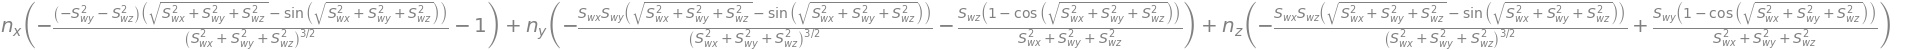

In [163]:
T = exp_twist(Swx, Swy, Swz, Svx, Svy, Svz)
e = n.dot(q - T@p)

s.diff(e, Svx)

In [164]:
R = rotation(Swx, Swy, Swz, Svx, Svy, Svz)
q, p, n = s.Matrix([[qx], [qy], [qz], [1]]), s.Matrix([[px], [py], [pz]]), s.Matrix([[nx], [ny], [nz]])

d = s.diff(R, Swx)

theta = s.symbols("\\theta")

d.subs(s.sqrt(Swx**2+Swy**2+Swz**2), theta)

⎡                                  ⎛        2         2⎞                      
⎢                           S_{wx}⋅⎝- S_{wy}  - S_{wz} ⎠⋅sin(\theta)   2⋅S_{wx
⎢                           ──────────────────────────────────────── - ───────
⎢                                                 3                           
⎢                                           \theta                            
⎢                                                                             
⎢      2                              2                                       
⎢S_{wx} ⋅S_{wy}⋅sin(\theta)   2⋅S_{wx} ⋅S_{wy}⋅(1 - cos(\theta))   S_{wx}⋅S_{w
⎢────────────────────────── - ────────────────────────────────── + ───────────
⎢               3                                4                            
⎢         \theta                           \theta                           \t
⎢                                                                             
⎢      2                              2             

In [165]:
sqr_bracket(Swx, Swy, Swz)

⎡   0     -S_{wz}  S_{wy} ⎤
⎢                         ⎥
⎢S_{wz}      0     -S_{wx}⎥
⎢                         ⎥
⎣-S_{wy}  S_{wx}      0   ⎦

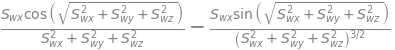

In [166]:
dA = s.diff(s.sin(s.sqrt(Swx**2+Swy**2+Swz**2))/s.sqrt(Swx**2+Swy**2+Swz**2), Swx)

dA

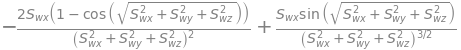

In [167]:
dB = s.diff((1 - s.cos(s.sqrt(Swx**2+Swy**2+Swz**2)))/s.sqrt(Swx**2+Swy**2+Swz**2)**2, Swx)

dB

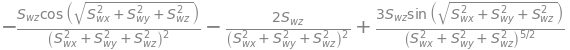

In [168]:
dC = s.diff((s.sqrt(Swx**2+Swy**2+Swz**2) - s.sin(s.sqrt(Swx**2+Swy**2+Swz**2)))/s.sqrt(Swx**2+Swy**2+Swz**2)**3, Swz)

s.simplify(dC)

In [188]:
def calc_coeffs(theta):
    return (
        s.sin(theta)/theta,
        (1-s.cos(theta))/(theta**2),
        (theta - s.sin(theta))/(theta**3),
        (theta*s.cos(theta) - s.sin(theta))/theta**3,
        (2*s.cos(theta) - 2 + theta*s.sin(theta))/theta**4,
        (3*s.sin(theta) - 2*theta - theta*s.cos(theta))/theta**5
    )

In [189]:
def calc_generators(Swx, Swy, Swz):
    w = sqr_bracket(Swx, Swy, Swz)
    w2 = w@w
    w_dash = [
        s.Matrix([
            [0,0,0],
            [0,0,-1],
            [0,1,0]
        ]), 
        s.Matrix([
            [0,0,1],
            [0,0,0],
            [-1,0,0]
        ]),
        s.Matrix([
            [0,-1,0],
            [1,0,0],
            [0,0,0]
        ])
    ]
    w2_dash = [x@w + w@x for x in w_dash]

    return w, w2, w_dash, w2_dash

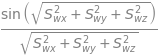

In [190]:
coeffs = calc_coeffs(s.sqrt(Swx**2+Swy**2+Swz**2))
coeffs[0]

In [191]:
gen = calc_generators(Swx, Swy, Swz)
gen[0]

⎡   0     -S_{wz}  S_{wy} ⎤
⎢                         ⎥
⎢S_{wz}      0     -S_{wx}⎥
⎢                         ⎥
⎣-S_{wy}  S_{wx}      0   ⎦

In [192]:
eye = s.Matrix([[1,0,0],[0,1,0],[0,0,1]])
rho = s.Matrix([[Svx], [Svy], [Svz]])
rhos = [s.Matrix([[1], [0], [0]]), s.Matrix([[0], [1], [0]]), s.Matrix([[0], [0], [1]])]
q, p, n = s.Matrix([[qx], [qy], [qz]]), s.Matrix([[px], [py], [pz]]), s.Matrix([[nx], [ny], [nz]])

In [193]:
drs = [(coeffs[3]*x*gen[0] + coeffs[0]*gen[2][i] + coeffs[4]*x*gen[1] + coeffs[1]*gen[3][i])@p for i, x in enumerate((Swx, Swy, Swz))]
dts = [(coeffs[4]*x*gen[0] + coeffs[1]*gen[2][i] + coeffs[5]*x*gen[1] + coeffs[2]*gen[3][i])@rho for i, x in enumerate((Swx, Swy, Swz))]
drhos = [(eye + coeffs[1]*gen[0] + coeffs[2]*gen[1])@x for x in rhos]

In [210]:
J_omega = [n.dot(-r-t) for r,t in zip(drs, dts)]
J_rho = [n.dot(-t) for t in drhos]

In [209]:
rot = rotation(Swx, Swy, Swz, Svx, Svy, Svz)
trans = translation(Swx, Swy, Swz, Svx, Svy, Svz)

e = n.dot(q - rot@p - trans)
s.simplify(s.diff(-rot@p, Swx) - drs[0])

⎡  ⎛                        ⎛   _____________________________⎞                
⎢  ⎜        3               ⎜  ╱       2         2         2 ⎟         3      
⎢2⋅⎝- S_{wx} ⋅S_{wy}⋅p_z⋅cos⎝╲╱  S_{wx}  + S_{wy}  + S_{wz}  ⎠ + S_{wx} ⋅S_{wz
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   